<a href="https://colab.research.google.com/github/ggarci10/4961kaur/blob/main/Saya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from keras.wrappers.scikit_learn import KerasClassifier
from  sklearn.model_selection  import  GridSearchCV

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

import os
import sys
import pickle
!git clone https://github.com/ggarci10/4961kaur.git
%cd /content/4961kaur/

Cloning into '4961kaur'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 90 (delta 16), reused 3 (delta 3), pack-reused 66
Receiving objects: 100% (90/90), 1.11 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/content/4961kaur


In [2]:
dummy = 'DummyDatanew.csv'

df = pd.read_csv(dummy)

df.head()

,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month,Leak,Building Type,Square Footage,Year constructed,Climate region,Number of workers
0,0,2023-06-01 00:08:33,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
1,1,2023-06-01 03:24:03,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
2,2,2023-06-01 08:04:32,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
3,3,2023-06-01 08:10:41,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256
4,4,2023-06-01 08:23:09,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06'],No,Office,"250,000",2006,Very cold/Cold,256


In [3]:
df.shape

(1036, 17)

In [4]:
df.isnull().sum()

Unnamed: 0           0
Date                 0
Event_ID             0
Duration             0
Volume               0
WaterClassify        0
EventFlowRate        0
meterNumber          0
gw                   0
CustomerId           0
Month                0
Leak                 0
Building Type        0
Square Footage       0
Year constructed     0
Climate region       0
Number of workers    0
dtype: int64

In [5]:
#df['Leak'].fillna('LowCon', inplace=True)

In [6]:
#df.isnull().sum()

In [7]:
from datetime import datetime

current_year = datetime.now().year
df.loc[:, 'BuildAge'] = current_year - df['Year constructed'] - 1
df.drop('Year constructed', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

df['Square Footage'] = df['Square Footage'].str.replace(',', '').astype(int)

df.head()

,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Leak,Building Type,Square Footage,Climate region,Number of workers,BuildAge
0,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
1,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
2,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
3,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17
4,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,No,Office,250000,Very cold/Cold,256,17


In [8]:
encode = ['WaterClassify', 'meterNumber', 'gw','CustomerId','Building Type','Climate region']

df = pd.get_dummies(df, columns=encode)

df.head()

,Event_ID,Duration,Volume,EventFlowRate,Leak,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0,0.0,0.265625,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
1,1,0.0,1.851562,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
2,2,0.0,0.265625,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
3,3,0.0,0.000000,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True
4,4,0.0,0.000000,0.0,No,250000,256,17,False,True,False,False,True,True,False,True,True,True


In [9]:
feature_cols = ['Duration','Volume','EventFlowRate','Square Footage',
                'Number of workers','BuildAge','WaterClassify_HighCon','WaterClassify_LowCon',
                'WaterClassify_MedCon','WaterClassify_Outliers','meterNumber_19240566',
                'gw_b827eb5e5925','gw_b827eb5e5926','CustomerId_10849','Building Type_Office',
                'Climate region_Very cold/Cold']

X = df[feature_cols]

X

,Duration,Volume,EventFlowRate,Square Footage,Number of workers,BuildAge,WaterClassify_HighCon,WaterClassify_LowCon,WaterClassify_MedCon,WaterClassify_Outliers,meterNumber_19240566,gw_b827eb5e5925,gw_b827eb5e5926,CustomerId_10849,Building Type_Office,Climate region_Very cold/Cold
0,0.0,0.265625,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1,0.0,1.851562,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
2,0.0,0.265625,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
3,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
4,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1032,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1033,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True
1034,0.0,0.000000,0.0,250000,256,17,False,True,False,False,True,True,False,True,True,True


In [10]:
y = df['Leak']

y

0       No
1       No
2       No
3       No
4       No
        ..
1031    No
1032    No
1033    No
1034    No
1035    No
Name: Leak, Length: 1036, dtype: object

In [11]:
leaks = df['Leak'].value_counts()
print(leaks)

Leak
No     807
Yes    229
Name: count, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
counter_before = Counter(y_train)
print('Before balancing :', counter_before)


smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
counter_after = Counter(y_train)
print('After balancing:', counter_after)

Before balancing : Counter({'No': 642, 'Yes': 186})
After balancing: Counter({'No': 642, 'Yes': 642})


In [13]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam',
                                         alpha=1e-5, random_state=1,
                                         learning_rate_init = 0.6, max_iter=400)

# creat the grid, and define the metric for evaluating the model:
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 

0.5015503875968992
{'hidden_layer_sizes': (1, 1)}


In [14]:
my_ANN = MLPClassifier(hidden_layer_sizes=(1,1), activation= 'logistic',
                       solver='adam', alpha=1e-5, random_state=1,
                       learning_rate_init = 0.1, max_iter=400)

my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.20673076923076922


In [15]:
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Y

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label='Yes')

print(fpr)
print("\n\n\n")
print(tpr)

[0. 1.]




[0. 1.]


In [17]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5


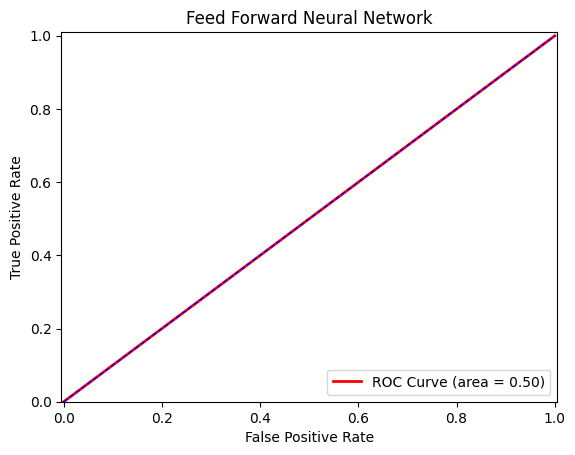

In [18]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2,
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Feed Forward Neural Network')
plt.legend(loc="lower right")

plt.show()

In [19]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_ann

pd.set_option('display.max_rows', None)
print(results)

     actual prediction
782      No        Yes
536     Yes        Yes
287      No        Yes
251      No        Yes
920      No        Yes
735      No        Yes
223      No        Yes
437      No        Yes
71       No        Yes
66       No        Yes
617     Yes        Yes
957      No        Yes
391      No        Yes
213      No        Yes
158      No        Yes
463      No        Yes
267      No        Yes
521     Yes        Yes
859      No        Yes
988      No        Yes
837      No        Yes
659     Yes        Yes
814      No        Yes
199      No        Yes
773      No        Yes
832      No        Yes
402     Yes        Yes
593     Yes        Yes
860      No        Yes
996      No        Yes
511     Yes        Yes
193      No        Yes
513     Yes        Yes
639     Yes        Yes
452      No        Yes
519     Yes        Yes
273      No        Yes
322      No        Yes
209      No        Yes
68       No        Yes
577     Yes        Yes
67       No        Yes
644     Yes

In [20]:
pd.reset_option('display.max_rows')

In [21]:
wc = 'WatreClassifyDataFrame.csv'

dfw = pd.read_csv(wc)

dfw.head()

,Unnamed: 0,Date,Event_ID,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId,Month
0,0,2023-06-01 00:08:33,0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
1,1,2023-06-01 03:24:03,1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
2,2,2023-06-01 08:04:32,2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
3,3,2023-06-01 08:10:41,3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']
4,4,2023-06-01 08:23:09,4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849,['2023-06']


In [22]:
dfw.drop('Date', axis=1, inplace=True)
dfw.drop('Month', axis=1, inplace=True)
dfw.drop('Event_ID', axis=1, inplace=True)
dfw.drop('Unnamed: 0', axis=1, inplace=True)

dfw.head()

,Duration,Volume,WaterClassify,EventFlowRate,meterNumber,gw,CustomerId
0,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849
1,0.0,1.851562,LowCon,0.0,19240566,b827eb5e5925,10849
2,0.0,0.265625,LowCon,0.0,19240566,b827eb5e5925,10849
3,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849
4,0.0,0.000000,LowCon,0.0,19240566,b827eb5e5925,10849


In [23]:
encode = ['meterNumber', 'gw','CustomerId']

dfw = pd.get_dummies(dfw, columns=encode)

dfw.head()

,Duration,Volume,WaterClassify,EventFlowRate,meterNumber_19240566,gw_b827eb5e5925,CustomerId_10849
0,0.0,0.265625,LowCon,0.0,True,True,True
1,0.0,1.851562,LowCon,0.0,True,True,True
2,0.0,0.265625,LowCon,0.0,True,True,True
3,0.0,0.000000,LowCon,0.0,True,True,True
4,0.0,0.000000,LowCon,0.0,True,True,True


In [24]:
feature_cols = ['Duration','Volume','EventFlowRate','meterNumber_19240566','gw_b827eb5e5925','CustomerId_10849']

X = dfw[feature_cols]

X

,Duration,Volume,EventFlowRate,meterNumber_19240566,gw_b827eb5e5925,CustomerId_10849
0,0.0,0.265625,0.0,True,True,True
1,0.0,1.851562,0.0,True,True,True
2,0.0,0.265625,0.0,True,True,True
3,0.0,0.000000,0.0,True,True,True
4,0.0,0.000000,0.0,True,True,True
...,...,...,...,...,...,...
1027,0.0,0.000000,0.0,True,True,True
1028,0.0,0.000000,0.0,True,True,True
1029,0.0,0.000000,0.0,True,True,True
1030,0.0,0.000000,0.0,True,True,True


In [25]:
y = dfw['WaterClassify']

y

0       LowCon
1       LowCon
2       LowCon
3       LowCon
4       LowCon
         ...  
1027    LowCon
1028    LowCon
1029    LowCon
1030    LowCon
1031    LowCon
Name: WaterClassify, Length: 1032, dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam',
                                         alpha=1e-5, random_state=1,
                                         learning_rate_init = 0.1, max_iter=400)

# creat the grid, and define the metric for evaluating the model:
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_train, y_train)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.9963708492506612
{'hidden_layer_sizes': (2, 2)}


In [28]:
my_ANN = MLPClassifier(hidden_layer_sizes=(2,2), activation= 'logistic',
                       solver='adam', alpha=1e-5, random_state=1,
                       learning_rate_init = 0.1, max_iter=400)

my_ANN.fit(X_train, y_train)
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.9951690821256038


In [29]:
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

['LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'MedCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon'
 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowCon' 'LowC

In [30]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_ann

pd.set_option('display.max_rows', None)
print(results)

       actual prediction
456    LowCon     LowCon
990    LowCon     LowCon
811    LowCon     LowCon
581    LowCon     LowCon
549    LowCon     LowCon
312    LowCon     LowCon
436    LowCon     LowCon
476    LowCon     LowCon
612    LowCon     LowCon
653    LowCon     LowCon
943    LowCon     LowCon
67     LowCon     LowCon
473    LowCon     LowCon
817    LowCon     LowCon
437    LowCon     LowCon
471    LowCon     LowCon
397    LowCon     LowCon
621    LowCon     LowCon
143    LowCon     LowCon
197    LowCon     LowCon
515    LowCon     LowCon
589    LowCon     LowCon
542    LowCon     LowCon
802    LowCon     LowCon
322    LowCon     LowCon
742    LowCon     LowCon
702    LowCon     LowCon
597    LowCon     LowCon
194    LowCon     LowCon
729    LowCon     LowCon
391    LowCon     LowCon
600    LowCon     LowCon
192    MedCon     MedCon
71     LowCon     LowCon
459    LowCon     LowCon
68     LowCon     LowCon
213    LowCon     LowCon
565    LowCon     LowCon
752    LowCon     LowCon


In [31]:
pd.reset_option('display.max_rows')

In [32]:
feature_cols = ['Duration','Volume','EventFlowRate','Square Footage',
                'Number of workers','BuildAge','WaterClassify_HighCon','WaterClassify_LowCon',
                'WaterClassify_MedCon','WaterClassify_Outliers','meterNumber_19240566',
                'gw_b827eb5e5925','gw_b827eb5e5926','CustomerId_10849','Building Type_Office',
                'Climate region_Very cold/Cold']

X = df[feature_cols]
y = df['Leak']
print(X)
print(y)

      Duration    Volume  EventFlowRate  Square Footage  Number of workers  \
0          0.0  0.265625            0.0          250000                256   
1          0.0  1.851562            0.0          250000                256   
2          0.0  0.265625            0.0          250000                256   
3          0.0  0.000000            0.0          250000                256   
4          0.0  0.000000            0.0          250000                256   
...        ...       ...            ...             ...                ...   
1031       0.0  0.000000            0.0          250000                256   
1032       0.0  0.000000            0.0          250000                256   
1033       0.0  0.000000            0.0          250000                256   
1034       0.0  0.000000            0.0          250000                256   
1035       0.0  0.000000            0.0          250000                256   

      BuildAge  WaterClassify_HighCon  WaterClassify_LowCon  \


In [33]:
from sklearn.linear_model import LogisticRegression



In [34]:
my_logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

counter_before = Counter(y_train)
print('Before balancing :', counter_before)


smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
counter_after = Counter(y_train)
print('After balancing:', counter_after)


my_logreg.fit(X_train,y_train)
y_predict_logreg=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg)
y_predict_prob_logreg = my_logreg.predict_proba(X_test)
print(round(logregaccuracy, 2))


Before balancing : Counter({'No': 650, 'Yes': 178})
After balancing: Counter({'No': 650, 'Yes': 650})
0.94


In [35]:
fprlogreg, tprlogreg, thresholdslogreg = metrics.roc_curve(y_test, y_predict_prob_logreg[:,1], pos_label='Yes')

print(fprlogreg)
print(tprlogreg)
AUClogreg = metrics.auc(fprlogreg, tprlogreg)
print(AUClogreg)

[0.         0.         0.         0.00636943 0.00636943 0.00636943
 0.01910828 0.03821656 0.05095541 0.05095541 0.05095541 0.65605096
 0.65605096 0.66878981 0.66878981 0.68152866 0.70700637 0.85987261
 0.87261146 0.87261146 0.92993631 0.94267516 1.        ]
[0.         0.01960784 0.11764706 0.11764706 0.15686275 0.17647059
 0.17647059 0.17647059 0.17647059 0.90196078 0.92156863 0.92156863
 0.94117647 0.94117647 0.96078431 0.96078431 0.96078431 0.96078431
 0.96078431 1.         1.         1.         1.        ]
0.9014612214312476


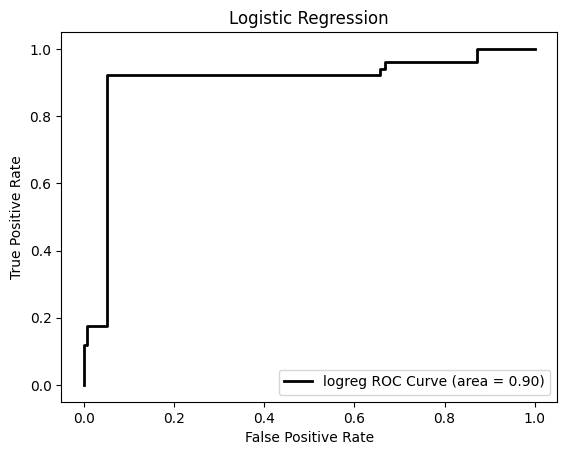

In [36]:
%matplotlib inline

plt.figure()
plt.plot(fprlogreg, tprlogreg, color='black', lw=2,label='logreg ROC Curve (area = %0.2f)' % AUClogreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")


In [37]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_logreg

pd.set_option('display.max_rows', None)
print(results)


     actual prediction
244      No         No
805      No         No
277      No         No
1026     No         No
578     Yes        Yes
131      No         No
693     Yes        Yes
143      No         No
133      No         No
218      No         No
372      No         No
225      No         No
635     Yes        Yes
663     Yes        Yes
1030     No         No
191      No         No
843      No         No
641     Yes        Yes
571     Yes        Yes
217      No         No
700     Yes        Yes
11      Yes        Yes
381      No         No
353      No        Yes
305      No         No
537     Yes         No
475      No         No
419      No         No
731      No         No
426      No         No
704      No        Yes
223      No         No
16      Yes        Yes
358      No         No
171      No         No
666     Yes        Yes
908     Yes        Yes
603     Yes        Yes
253      No         No
770      No         No
781      No         No
307      No         No
582     Yes

In [38]:
projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'Saya.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()


/content/4961kaur/projectname.pickle


In [39]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn)

print(round(knnaccuracy,2))
y_predict_prob_knn= knn.predict_proba(X_test)


0.95


In [40]:
fprknn, tprknn, thresholdssknn = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label='Yes')

print(fprknn)
print(tprknn)
AUCknn = metrics.auc(fprknn, tprknn)
print(AUCknn)

[0.         0.00636943 0.01273885 0.01910828 0.02547771 0.05095541
 0.05095541 0.05732484 0.07006369 0.07643312 1.        ]
[0.         0.88235294 0.90196078 0.94117647 0.94117647 0.96078431
 0.98039216 0.98039216 0.98039216 0.98039216 1.        ]
0.9840764331210192


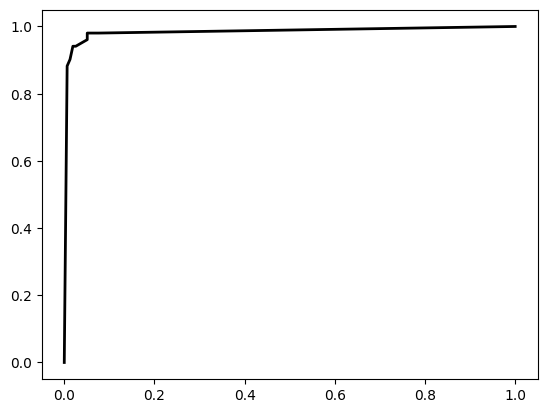

In [41]:
%matplotlib inline

plt.figure()
plt.plot(fprknn, tprknn, color='black', lw=2,label='knn ROC Curve (area = %0.2f)' % AUCknn)


In [42]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict_knn

pd.set_option('display.max_rows', None)
print(results)

     actual prediction
244      No         No
805      No         No
277      No         No
1026     No         No
578     Yes        Yes
131      No         No
693     Yes        Yes
143      No         No
133      No         No
218      No         No
372      No         No
225      No         No
635     Yes        Yes
663     Yes        Yes
1030     No         No
191      No         No
843      No         No
641     Yes        Yes
571     Yes        Yes
217      No         No
700     Yes        Yes
11      Yes        Yes
381      No         No
353      No         No
305      No         No
537     Yes        Yes
475      No         No
419      No         No
731      No         No
426      No         No
704      No         No
223      No         No
16      Yes         No
358      No         No
171      No         No
666     Yes        Yes
908     Yes        Yes
603     Yes        Yes
253      No         No
770      No         No
781      No         No
307      No         No
582     Yes

In [43]:
from sklearn.neighbors import kneighbors_graph
import seaborn as sns

Text(0, 0.5, 'Accuracy Score')

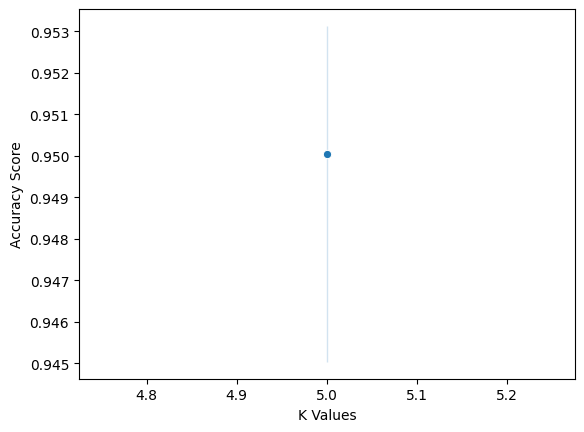

In [44]:
k_values=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = 5, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")